In [1]:
import requests
import os

In [39]:
from PttWebCrawler.crawler import *
file_path=os.path.abspath("")
c = PttWebCrawler(as_lib=True)
file_name=c.parse_articles(1, 50, 'Gossiping',path=file_path)

Processing index: 1
Processing article: M.1119222611.A.7A9
Processing article: M.1119222660.A.94E
Processing article: M.1119233779.A.191
Processing article: M.1119240642.A.EB1
Processing article: M.1119243418.A.790
Processing article: M.1119245434.A.830
Processing article: M.1119247736.A.35B
Processing article: M.1119250669.A.EA3
Processing article: M.1119257927.A.60D
Processing article: M.1119258686.A.6FC
Processing article: M.1119259437.A.FC2
Processing article: M.1119260880.A.D81
Processing article: M.1119263351.A.BED
Processing article: M.1119264333.A.E75
Processing article: M.1119271499.A.567
Processing article: M.1119273275.A.49F
Processing article: M.1119274578.A.519
Processing article: M.1119341662.A.BF4
Processing article: M.1119353007.A.95E
Processing article: M.1119354366.A.960
Processing index: 2
Processing article: M.1119361001.A.DA8
Processing article: M.1119364372.A.D47
Processing article: M.1119364785.A.D9B
Processing article: M.1119366798.A.776
Processing article: M.11

Processing article: M.1120567529.A.E5D
Processing article: M.1120571034.A.C4B
Processing article: M.1120572156.A.D5D
Processing article: M.1120574102.A.1E9
Processing article: M.1120579660.A.F9E
Processing article: M.1120581056.A.E9D
Processing article: M.1120583639.A.A40
Processing article: M.1120585117.A.A98
Processing article: M.1120587721.A.A3E
Processing article: M.1120617904.A.A97
Processing article: M.1120628477.A.8A5
Processing article: M.1120630395.A.097
Processing article: M.1120634798.A.5DD
Processing article: M.1120635815.A.75B
Processing article: M.1120639384.A.87E
Processing index: 12
Processing article: M.1120645121.A.F86
Processing article: M.1120651118.A.021
Processing article: M.1120659178.A.B42
Processing article: M.1120662763.A.BDF
Processing article: M.1120666706.A.093
Processing article: M.1120676536.A.BA9
Processing article: M.1120701547.A.AA9
Processing article: M.1120712794.A.A52
Processing article: M.1120731028.A.89C
Processing article: M.1120734011.A.06E
Proc

Processing article: M.1123127288.A.F75
Processing article: M.1123128996.A.5A2
Processing article: M.1123145124.A.D88
Processing article: M.1123154043.A.3F3
Processing article: M.1123154770.A.5E6
Processing article: M.1123157560.A.03E
Processing article: M.1123160183.A.234
Processing article: M.1123160297.A.2E1
Processing article: M.1123165291.A.DBB
Processing article: M.1123174946.A.7AF
Processing index: 22
Processing article: M.1123175049.A.CF9
Processing article: M.1123177619.A.5E6
Processing article: M.1123178552.A.F27
Processing article: M.1123179598.A.2AA
Processing article: M.1123181182.A.945
Processing article: M.1123181853.A.0B3
Processing article: M.1123214700.A.14B
Processing article: M.1123221950.A.8BF
Processing article: M.1123228571.A.E6B
Processing article: M.1123230125.A.D8C
Processing article: M.1123232027.A.BA8
Processing article: M.1123236323.A.F45
Processing article: M.1123240936.A.9D9
Processing article: M.1123241416.A.B60
Processing article: M.1123248836.A.90C
Proc

Processing article: M.1126101965.A.38A
Processing article: M.1126102232.A.0AF
Processing article: M.1126112828.A.3C8
Processing article: M.1126125473.A.1FF
Processing article: M.1126146664.A.2ED
Processing index: 32
Processing article: M.1126163222.A.AB9
Processing article: M.1126163236.A.4FE
Processing article: M.1126167557.A.23B
Processing article: M.1126190870.A.0E4
Processing article: M.1126304242.A.501
Processing article: M.1126333859.A.021
Processing article: M.1126356096.A.5B8
Processing article: M.1126357094.A.99C
Processing article: M.1126358714.A.66D
Processing article: M.1126359333.A.08C
Processing article: M.1126402549.A.45B
Processing article: M.1126409332.A.68B
Processing article: M.1126416494.A.967
Processing article: M.1126432659.A.A04
Processing article: M.1126438780.A.12D
Processing article: M.1126444956.A.FD1
Processing article: M.1126450742.A.3B2
Processing article: M.1126456838.A.0DE
Processing article: M.1126508227.A.B0B
Processing article: M.1126520801.A.679
Proc

Processing index: 42
Processing article: M.1139381314.A.593
Processing article: M.1139388306.A.139
Processing article: M.1139391725.A.687
Processing article: M.1139394088.A.8A8
Processing article: M.1139394400.A.7C2
Processing article: M.1139395342.A.6B6
Processing article: M.1139395595.A.7C9
Processing article: M.1139399835.A.2F8
Processing article: M.1139402260.A.F07
Processing article: M.1139402375.A.7AB
Processing article: M.1139406592.A.C86
Processing article: M.1139410509.A.4AA
Processing article: M.1139411521.A.BF5
Processing article: M.1139412958.A.67D
Processing article: M.1139413676.A.049
Processing article: M.1139419094.A.0DB
Processing article: M.1139419188.A.BDF
Processing article: M.1139419387.A.4EE
Processing article: M.1139419478.A.0AD
Processing article: M.1139420004.A.612
Processing index: 43
Processing article: M.1139420009.A.272
Processing article: M.1139420216.A.BEF
Processing article: M.1139423383.A.4C9
Processing article: M.1139427856.A.7FB
Processing article: M.

In [40]:
# file_name='/Users/claire/Desktop/tfidf_demo/Tech_Job-1-10.json'

In [41]:
import json 
  
# Opening JSON file 
f = open(file_name) 
# returns JSON object as  
# a dictionary 
data = json.load(f) 

In [42]:
import pandas as pd  

In [43]:
article_df=pd.json_normalize(data['articles'])
article_df.head(5)

,article_id,article_title,author,board,content,date,ip,messages,url,message_count.all,message_count.boo,message_count.count,message_count.neutral,message_count.push
0,M.1119222611.A.7A9,第一耶！,gogoegg (--),Gossiping,1 Gossiping 綜合 記者，你的名字是抄襲。 HOTlinkinpork/to 2 ...,Mon Jun 20 07:11:31 2005,None,"[{'push_content': '被M了，恭喜!!', 'push_ipdatetime...",https://www.ptt.cc/bbs/Gossiping/M.1119222611....,1491,777,-399,336,378
1,M.1119222660.A.94E,Re: (問題)華航空難留言,Muroi (I Honestly Love You),Gossiping,看到這推文忍不住要寫一個飛機沒油的例子 很久之前在讀者文摘上看到現憑印象寫文有錯請指正 某家...,Mon Jun 20 07:28:27 2005,None,"[{'push_content': '飛機沒有油了並不會就墜毀好嗎', 'push_ipda...",https://www.ptt.cc/bbs/Gossiping/M.1119222660....,911,165,365,216,530
2,M.1119233779.A.191,Re: 有沒有明天會更好的八卦,JCC (JCC ),Gossiping,那不是為了反盜版 那是為了捐錢給消基會 當年美國唱了 WE ARE THE WORLD之後 ...,Mon Jun 20 10:21:53 2005,None,"[{'push_content': '反盜版大合唱應該是「第一種聲音」這張吧~', 'pus...",https://www.ptt.cc/bbs/Gossiping/M.1119233779....,345,48,134,115,182
3,M.1119240642.A.EB1,Re: 請問還有濁水溪公設的八卦嗎,goddora (dora),Gossiping,: 如題 : 感謝各位大哥大姐 濁水溪公社最早期的前身叫 霹靂鳥四號 那時候夾子的小映也是裡...,Mon Jun 20 12:37:53 2005,None,"[{'push_content': '媽的，還滿想聽他到底怎麼打', 'push_ipdat...",https://www.ptt.cc/bbs/Gossiping/M.1119240642....,254,38,118,60,156
4,M.1119243418.A.790,Re: (問題)華航空難留言,MCI (步步步步步步步步),Gossiping,: 引述《certifi (i miss you)》之銘言： : : 看到這邊，就知道是垃圾...,Mon Jun 20 13:04:48 2005,None,"[{'push_content': '高上尉是高滑助嗎?', 'push_ipdatetim...",https://www.ptt.cc/bbs/Gossiping/M.1119243418....,301,44,135,78,179


In [44]:
# coding=utf-8
import jieba
import word2vec
import pandas as pd
from urllib.parse import urlparse
import re
import numpy as np
import random
import jieba
import monpa
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import coo_matrix
import string
# jieba.enable_paddle()# 启动paddle模式。 0.40版之后开始支持，早期版本不支持
# jieba.load_userdict('user_dict.txt')
# jieba.set_dictionary("dict.txt.big")


In [45]:
def clean_data(df,col):
    # remove the url from the post
    def is_url(url):
        try:
            result = urlparse(url)
            return all([result.scheme, result.netloc])
        except ValueError:
            return False

    # remove punctuation from the post
    def remove_punctuation(line):
        rule = re.compile("[^\u4e00-\u9fa5^.^a-z^A-Z]")
        line = rule.sub(' ', line)
        line  = re.sub('[%s]' % re.escape(string.punctuation), '',line )
        return line
    
    next_col = col+'_new'
    df[col]=df[col].replace('\r','',regex=True)
    df = df.dropna(subset=[col])
    df[next_col] = [
        ' '.join(y for y in x.split() if not is_url(y)) for x in df[col]]
    df[next_col] = df[next_col].replace('\n', ' ', regex=True)
    df[next_col] = df[next_col].apply(remove_punctuation)
    df = df.replace(r'^\s*$', np.nan, regex=True)
    df = df.dropna(subset=[next_col])
    df.drop_duplicates(subset=[next_col], keep='last', inplace=True)
    return df

In [46]:
def readstopword():
    stop_word_path = 'stop_word.txt'
    Stopwords_List = [line.strip() for line in open(
        stop_word_path, 'r', encoding='UTF-8').readlines()]
    return Stopwords_List


def jieba_tokenizer(text):
    text = text.lower()
    Stopwords_List = readstopword()
    wordlist = []
    seg_list = "/".join(jieba.cut(text, cut_all=False))
#     try:
#         seg_list = "/".join(monpa.cut(text))
#     except:
#         pass
    for textword in seg_list.split('/'):
        if not (textword.strip() in Stopwords_List) and len(textword.strip()) > 1:
            wordlist.append(textword)

    return ' '.join(wordlist)


In [47]:
col = 'content'
next_col = col+'_new'
clean_result=clean_data(article_df,col)

In [48]:
clean_result['tokenized'] = clean_result.loc[:,next_col].apply(jieba_tokenizer)

In [49]:
def count_word_in_content(token_series):
    word_vector={}
    for index,text in enumerate(token_series.to_list()):
        word_list=text.split(' ')
        for word in word_list:
            if word not in word_vector:
                word_vector[word]={}
                word_vector[word][index]=1
            elif index not in word_vector[word]:
                word_vector[word][index]=1
            else:
                word_vector[word][index]+=1
    word_vector_list=[]
    for word,key in word_vector.items():
        for index,number in key.items():
            word_vector_list.append([word,index,number])
    word_vector_df=pd.DataFrame(data=word_vector_list,columns=['word','index','number'])
    return word_vector_df

In [50]:
word_vector_df=count_word_in_content(clean_result['tokenized'])
word_vector_df.head(5)

,word,index,number
0,gossiping,0,1
1,gossiping,229,1
2,gossiping,495,1
3,gossiping,637,1
4,gossiping,670,2


In [51]:
content_count_term=word_vector_df.groupby('word').count()['index'].reset_index()
content_count_term=content_count_term.rename(columns={'index':'content_count_term'})

In [52]:
word_vector_df=pd.merge(word_vector_df,content_count_term,on='word',how='left')
word_vector_df.head(5)

,word,index,number,content_count_term
0,gossiping,0,1,8
1,gossiping,229,1,8
2,gossiping,495,1,8
3,gossiping,637,1,8
4,gossiping,670,2,8


In [53]:
word_vector_df['tf']=word_vector_df['number']
ttl_info=len(pd.unique(word_vector_df['index']))
word_vector_df['idf']=np.log(ttl_info/word_vector_df['content_count_term'])+1

In [54]:
word_vector_df['tfidf_manual']=word_vector_df['tf']*word_vector_df['idf']

In [55]:
word_vector_df[word_vector_df['index']==0].head()

,word,index,number,content_count_term,tf,idf,tfidf_manual
0,gossiping,0,1,8,1,5.824306,5.824306
8,綜合,0,1,11,1,5.505852,5.505852
19,記者,0,1,144,1,2.933934,2.933934
163,名字,0,1,90,1,3.403938,3.403938
253,抄襲,0,1,9,1,5.706523,5.706523


## Checkout Count

In [57]:
cv = CountVectorizer()
word_matrix = cv.fit_transform(clean_result['tokenized'].tolist())


In [58]:
text_dict=dict()
feature_name=cv.get_feature_names()
feature_name_df=pd.DataFrame(data=enumerate(feature_name),columns=['col_index','word'])

In [59]:
tmp=coo_matrix(word_matrix)
tf_df=pd.DataFrame({'index': tmp.row, 'col_index': tmp.col, '_tf': tmp.data} )[['index', 'col_index', '_tf']]
td_df=pd.merge(tf_df,feature_name_df,on='col_index',how='left')

In [60]:
compare_tf=pd.merge(word_vector_df,td_df,on=['index','word'],how='outer')
compare_tf[compare_tf['_tf']!=compare_tf['tf']].index.size

0

## Checkout idf

In [62]:
tfidf_transformer = TfidfVectorizer(norm=None, smooth_idf=False )
tfidf_matrix=tfidf_transformer.fit_transform(clean_result['tokenized'].to_list())

In [63]:
idf_dict=pd.DataFrame(zip(tfidf_transformer.get_feature_names(),tfidf_transformer.idf_),columns=['word','_idf'])
idf_dict.head(10)

,word,_idf
0,aa,7.903747
1,aahen,7.903747
2,aajimmy,7.903747
3,ab,6.805135
4,abc,6.517453
5,abcvictor,7.210600
6,abian,7.903747
7,abk,7.903747
8,aboard,7.903747
9,about,6.805135


In [64]:
## checkcout 
##的值是否一樣 :不一樣的會吐出來
idf_dict
check_idf=pd.merge(word_vector_df,idf_dict,on='word',how='left')
check_idf[check_idf['idf']!=check_idf['_idf']].index.size

0

## 使用tfidf

In [66]:
clean_result_df=clean_result[~clean_result['tokenized'].isnull()]
def textFeatureExtraction(token_data):
    cv = CountVectorizer()
    # 將文字中的詞語轉換為詞頻矩陣，矩陣元素a[i][j] 表示j詞在i類文字下的詞頻
    word_matrix = cv.fit_transform(token_data)
    vocab = pd.DataFrame(cv.get_feature_names(), columns=['word'])
    vocab['col_index'] = vocab.index
    # 統計每一個詞語的tf-idf權值
    tfidf_transformer = TfidfTransformer(norm=None, smooth_idf=False,use_idf=True)
    tfidf_matrix = tfidf_transformer.fit_transform(word_matrix)
    return word_matrix, tfidf_matrix, vocab
word_matrix, tfidf_matrix, vocab = textFeatureExtraction( clean_result_df['tokenized'])

In [67]:
tmp = coo_matrix(tfidf_matrix)
result= pd.DataFrame({'index': tmp.row, 'col_index': tmp.col, 'tfidf': tmp.data} )[['index', 'col_index', 'tfidf']].sort_values(['index', 'col_index'])
tfidf_result = pd.merge(result, vocab, on='col_index', how='left')
tfidf_result = tfidf_result[['index', 'word', 'tfidf']]
tfidf_result.to_csv('result.csv')
sorted_tf_idf=tfidf_result.sort_values(by='tfidf',ascending=False)
clean_result_df=clean_result_df.reset_index()
clean_result_df['index']=clean_result_df.index

In [68]:
result=pd.merge(sorted_tf_idf,clean_result_df[['article_title','index',col,col+'_new','tokenized']],how='left',on='index').sort_values(by=['index','tfidf'],ascending=False)
tfidf_Top10=result.groupby('index').head(10)

In [69]:
tfidf_Top10_agg_word=tfidf_Top10.groupby(['article_title','index',col,col+'_new','tokenized'],as_index=False). agg({'word': ' ,'.join})
tfidf_Top10_agg_word.head(10)

,article_title,index,content,content_new,tokenized,word
0,2100大爆料整理。,241,我以前在tvbs2100當過工讀生一陣子， 那時候只要上節目的來賓， 完全不用爭吵方式上節目...,我以前在tvbs 當過工讀生一陣子 那時候只要上節目的來賓 完全不用爭吵方式上節目...,以前 tvbs 當過 工讀 生一陣子 那時候 上節 目的 來賓 完全 不用 爭吵 方式 下次...,"支持者 ,tvbs ,來賓 ,國民黨 ,藍綠 ,高層 ,立委 ,大選 ,不用 ,打電話"
1,B6的長野伯,624,在V6中長野好像屬於比較沒什麼新聞的人 其他5個人或多或少都有傳過緋聞之類的 請問有關於長野...,在V 中長野好像屬於比較沒什麼新聞的人 其他 個人或多或少都有傳過緋聞之類的 請問有關於長野...,中長 好像 沒什麼 新聞 或多或少 傳過 緋聞 問有關 野博 八卦 先寫 網查 出生 神奈川...,"smap ,坂本 ,美食 ,尼斯 ,離開傑 ,金八老師 ,開腳 ,野是邊 ,或多或少 ,先寫"
2,Re: 我想請問關於【南海血書】。,51,我講一下大意好了 不過太久 細節可能記錯 主要是描述一群生活在水深火熱中的大陸同胞(？) (...,我講一下大意好了 不過太久 細節可能記錯 主要是描述一群生活在水深火熱中的大陸同胞 ...,我講 一下 大意 太久 細節 可能 記錯 主要 描述 一群 生活 水深 火熱中 大陸 同胞 ...,"血書 ,南海 ,父親 ,故事 ,中間 ,上岸 ,不過類 ,乘船 ,人聊 ,共產"
3,Re: 請問有加拿大華人的八卦嗎?,754,: 加拿大境內的華人為何會那麼多呢? : 在那邊華人的移民是最大宗... : 好像在當地來說...,加拿大境內的華人為何會那麼多呢 在那邊華人的移民是最大宗 好像在當地來說 有些...,加拿大 境內 華人為 何會 邊華人 移民 最大 好像 華人 感覺 還蠻 富有 到底 原因 加...,"移民 ,加拿大 ,華人 ,富有 ,出國 ,中產階級 ,灣人 ,香港 ,階級 ,移出"
4,Re: (問題)華航空難留言,1,看到這推文忍不住要寫一個飛機沒油的例子 很久之前在讀者文摘上看到現憑印象寫文有錯請指正 某家...,看到這推文忍不住要寫一個飛機沒油的例子 很久之前在讀者文摘上看到現憑印象寫文有錯請指正 某家...,看到 這推文 忍不住 一個 飛機 沒油 例子 之前 讀者 文摘 看到 現憑 印象 寫文有 指...,"這架 ,滑翔 ,油料 ,客機 ,文摘 ,飛機 ,駕駛真 ,這推文 ,英制 ,翻讀"
5,Re: (問題)華航空難留言,4,: 引述《certifi (i miss you)》之銘言： : : 看到這邊，就知道是垃圾...,引述 certifi i miss you 之銘言 看到這邊 就知道是垃圾...,引述 certifi miss you 之銘言 看到 知道 垃圾 日華 航空 巴士 中正 機...,"墜毀 ,上將 ,司令 ,外海 ,空難 ,官階 ,上尉 ,澎湖 ,直升 ,幾位"
6,Re: ......原來林稚齡曾經是我表舅媽...,476,既然有人提到這個 我也來說一個麟至麟的小八卦 差不多四、五年前麟至麟還沒有很紅的時候 有拍過...,既然有人提到這個 我也來說一個麟至麟的小八卦 差不多四 五年前麟至麟還沒有很紅的時候 有拍過...,有人 提到 一個麟 至麟 八卦 差不多 五年 前麟 至麟 還沒有 很紅 拍過 一支 洗衣粉 ...,"至麟 ,老板 ,洗衣粉 ,一個麟 ,來麟 ,前麟 ,印店 ,叫麟 ,姓王 ,媽年"
7,Re: Area 51,322,: Area 51 : 裡面到底是幹嘛的阿 : 大部分都說他是研發戰機的 : 真的只有這樣嘛...,Area 裡面到底是幹嘛的阿 大部分都說他是研發戰機的 真的只有這樣嘛...,area 裡面 到底 大部分 研發 戰機 真的 戰機 軍事 方面 先進 測試 area 全圖...,"area ,戰機 ,測試 ,地面 ,全圖 ,爆破 ,簡体 ,先進 ,炸彈 ,北方"
8,Re: SNAP的森且型,190,: 引述《allenchen98 (懦夫救星)》之銘言： : : SMAP一開始是六個人 :...,引述 allenchen 懦夫救星 之銘言 SMAP一開始是六個人 ...,引述 allenchen 懦夫 救星 之銘言 smap 一開始 六個 森且 行後來 退出 當...,"smaq ,森且 ,尼斯 ,賽車 ,團體 ,解散 ,不照 ,中居 ,退出 ,公司"
9,Re: SNAP的森且型,191,: 引述《chaise (透子)》之銘言： : : 並沒有剪掉啊 : : 我總是有看到森且行...,引述 chaise 透子 之銘言 並沒有剪掉啊 我總是有看到森且行...,引述 chaise 透子 之銘言 並沒有 剪掉 看到 森且 幾乎 看不到 ms 最近 剪接 ...,"smap ,森且 ,smaq ,木村 ,賽車 ,尼斯 ,團體 ,中居 ,解散 ,有森"


In [76]:
tfidf_Top10_agg_word.to_csv('tfidf_Top10_agg_word.csv', encoding='utf_8_sig')

In [70]:
count_tag=tfidf_Top10.groupby('word').count()
word_list=count_tag[count_tag['index']>10].sort_values('index',ascending=False).index.tolist()

In [71]:
count_tag.sort_values('index',ascending=False).head(10)

,index,tfidf,article_title,content,content_new,tokenized
word,,,,,,
日本,33,33,33,33,33,33
公司,28,28,28,28,28,28
老師,22,22,22,22,22,22
朋友,22,22,22,22,22,22
台灣,20,20,20,20,20,20
立委,19,19,19,19,19,19
小姐,19,19,19,19,19,19
香港,16,16,16,16,16,16
先生,15,15,15,15,15,15


In [72]:
def generate_tag_table(df,column):
    tag_table=pd.DataFrame(pd.unique(df[column]),columns=['tag_value'])
#     tag_table['tag_id']=tag_table.index
    return tag_table

## 文字雲

In [73]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [74]:
wc = WordCloud(
  background_color='black',        #   背景顏色
  max_words=200,                   #   最大分詞數量
  mask=None,                       #   背景圖片
  max_font_size=None,              #   顯示字體的最大值
#   stopwords=STOPWORDS.add(stopword),   #   使用內置的屏蔽詞，再添加一個
#   font_path=font_path,             #   若為中文則需引入中文字型(.TTF)
  random_state=None,               #   隨機碼生成各分詞顏色
  prefer_horizontal=0.9)           #   調整分詞中水平和垂直的比例

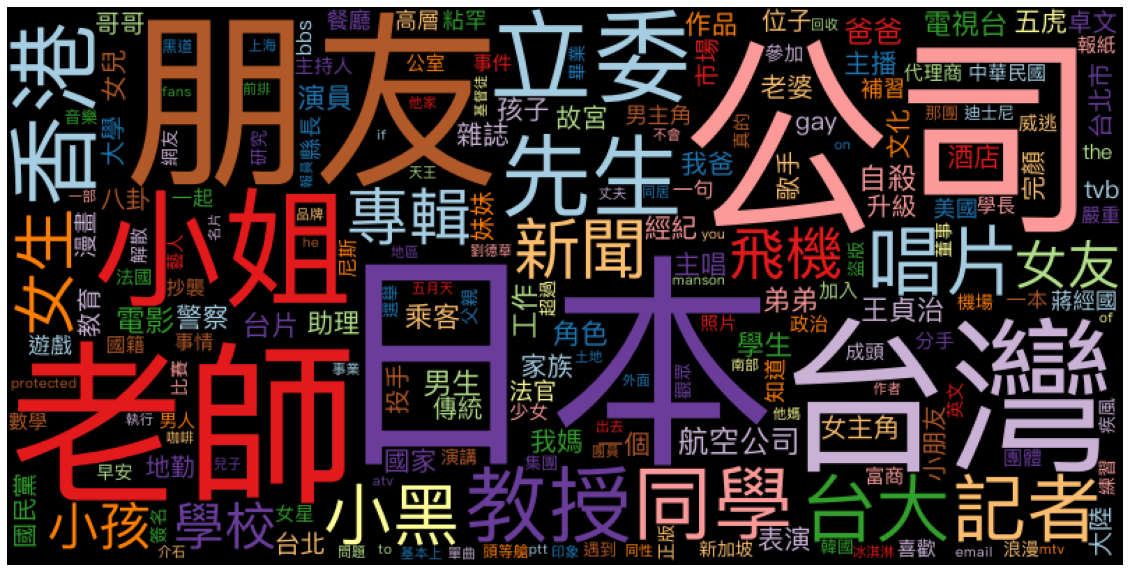

In [75]:
font_path="/System/Library/fonts/PingFang.ttc" # 標楷體

wc = WordCloud(background_color='black',font_path=font_path,height=400,width=800,colormap='Paired')
wc.fit_words(count_tag['index'].to_dict())
import matplotlib.pyplot as plt
plt.figure(figsize=(20,40))
plt.imshow(wc)
plt.axis("off")
plt.show()
